In [10]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-fuzzy in c:\users\mmp\anaconda3\envs\tensorflow\lib\site-packages (0.5.0)



In [11]:
import cv2 as opencv
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the image and convert to grayscale
image = opencv.imread('C:\\Users\\MMP\\Downloads\\tom and jerry.jpg')
gray_image = opencv.cvtColor(image, opencv.COLOR_BGR2GRAY)

In [13]:
# Normalize the grayscale image to [0, 1] for fuzzy logic
gray_norm = gray_image / 255.0

In [14]:
# Define custom fuzzy membership functions for low, medium, and high intensity
def fuzzy_low(x):
    return np.maximum(0, np.minimum(1, (0.5 - x) / 0.5))

def fuzzy_medium(x):
    return np.maximum(0, np.minimum(1, (x - 0.25) / 0.25, (0.75 - x) / 0.25))

def fuzzy_high(x):
    return np.maximum(0, np.minimum(1, (x - 0.5) / 0.5))


In [15]:
# Apply fuzzy membership functions to the normalized image
low_fuzzy = fuzzy_low(gray_norm)
medium_fuzzy = fuzzy_medium(gray_norm)
high_fuzzy = fuzzy_high(gray_norm)

In [16]:
# Combine fuzzy sets (fuzzy rule for edges: either low and medium, or high)
fuzzy_edges = np.maximum(np.minimum(low_fuzzy, medium_fuzzy), high_fuzzy)

In [17]:
# Convert fuzzy result to binary edges for visualization
_, binary_edges = opencv.threshold(fuzzy_edges, 0.5, 1, opencv.THRESH_BINARY)

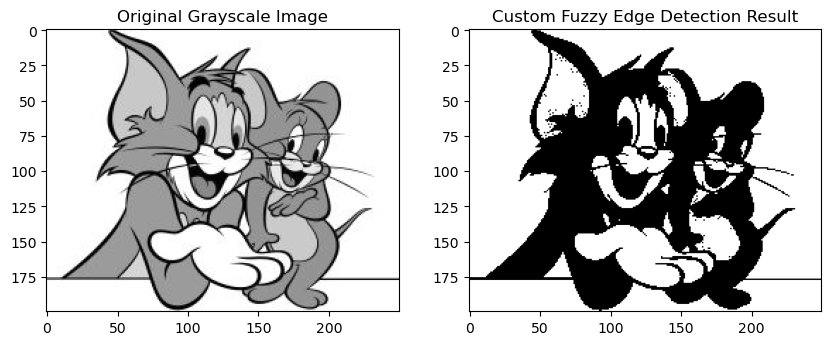

In [18]:
# Display the result
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Custom Fuzzy Edge Detection Result')
plt.imshow(binary_edges, cmap='gray')
plt.show()